# MNIST Dynamic Filter Classification - Result

Note: This notebook is desinged to run with GPU runtime.

####[MDR-01]
Import modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, saving
from tensorflow.keras.datasets import mnist

####[MDR-02]
Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


####[MDR-03]
Mount your Google Drive on `/content/gdrive`.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####[MDR-04]
Confirm that the exported model file `MNIST_single.keras` is on your Google Drive.

In [4]:
!ls -l '/content/gdrive/My Drive/MNIST_single.keras'

-rw------- 1 root root 38707193 Feb 16 07:32 '/content/gdrive/My Drive/MNIST_single.keras'


####[MDR-05]
Restore the model from the exported model file.

In [11]:
model = saving.load_model('/content/gdrive/My Drive/MNIST_single.keras')
model.summary()

Model: "CNN_single_layer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_filter (Conv2D)                 │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling (MaxPooling2D)           │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,445,910 (24.59 MB)

 Trainable params: 3,222,954 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,222,956 (12.29 MB)

####[MDR-06]
Define a model to extract outputs from intermediate layers.

In [6]:
layer_outputs = [model.get_layer('conv_filter').output,
                 model.get_layer('max_pooling').output]
model2 = models.Model(inputs=model.inputs[0], outputs=layer_outputs)

####[MDR-07]
Apply the trained filters to the MNIST dataset.

In [7]:
conv_output, pool_output = model2.predict(test_images[:9])
filter_vals = model.get_layer('conv_filter').get_weights()[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


####[MDR-08]
Show images after applying the convolutional filters.

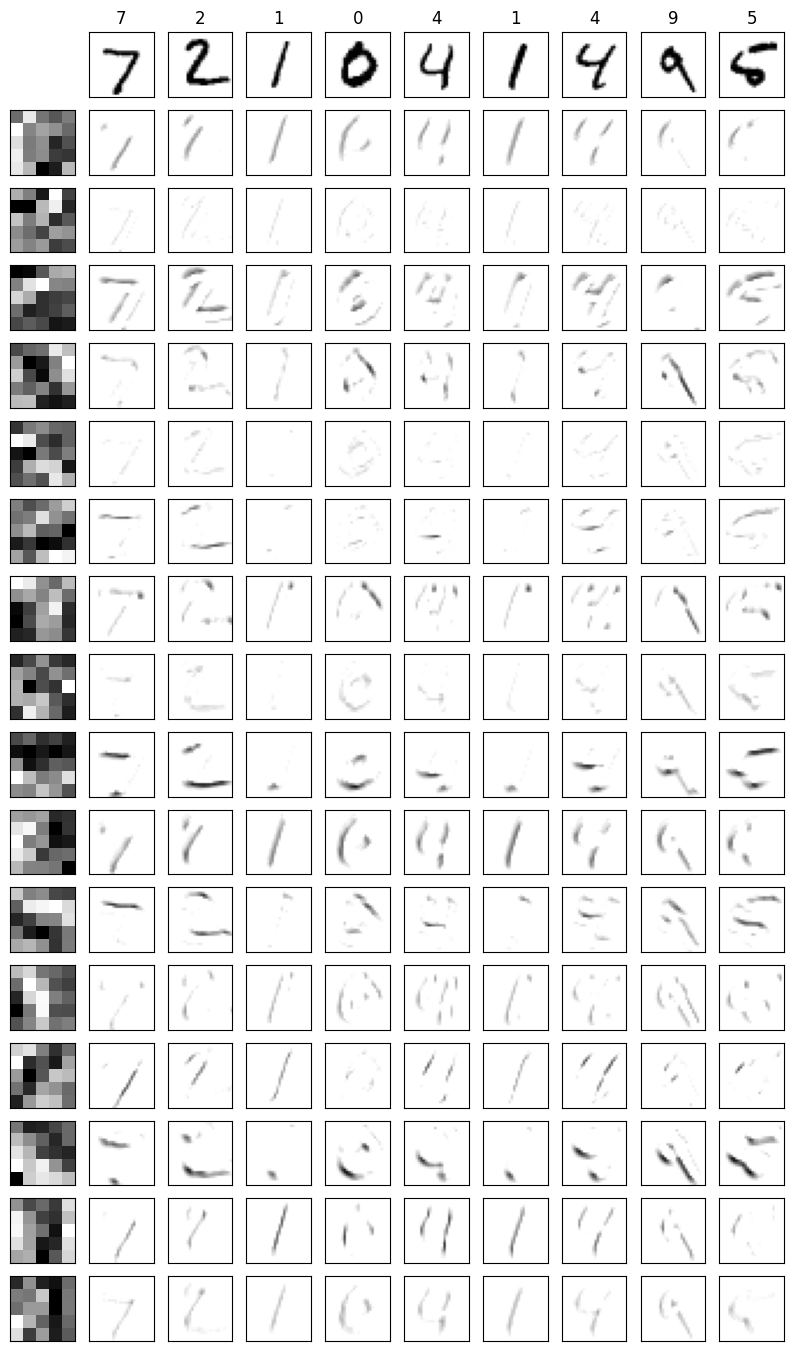

In [8]:
num_filters = 16
fig = plt.figure(figsize=(10, num_filters+1))
v_max = np.max(conv_output)

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(np.argmax(test_labels[i]))
    subplot.imshow(test_images[i].reshape((28,28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_output[i,:,:,f],
                       vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

####[MDR-09]
Show images after applying the pooling layer.

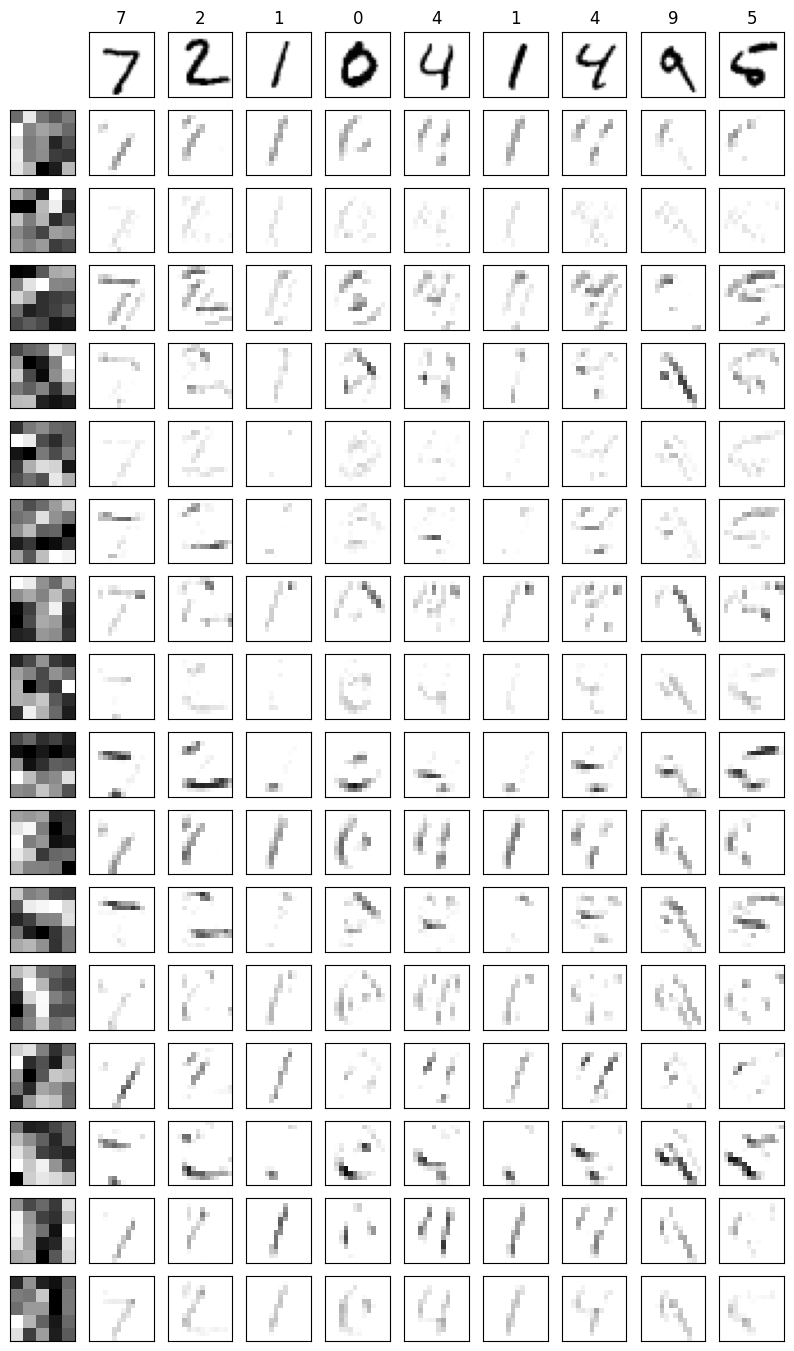

In [9]:
num_filters = 16
fig = plt.figure(figsize=(10, num_filters+1))
v_max = np.max(pool_output)

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(np.argmax(test_labels[i]))
    subplot.imshow(test_images[i].reshape((28,28)),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(pool_output[i,:,:,f],
                       vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

####[MDR-10]
Show prodiction results (probability for each digit) for incorrect predictions.

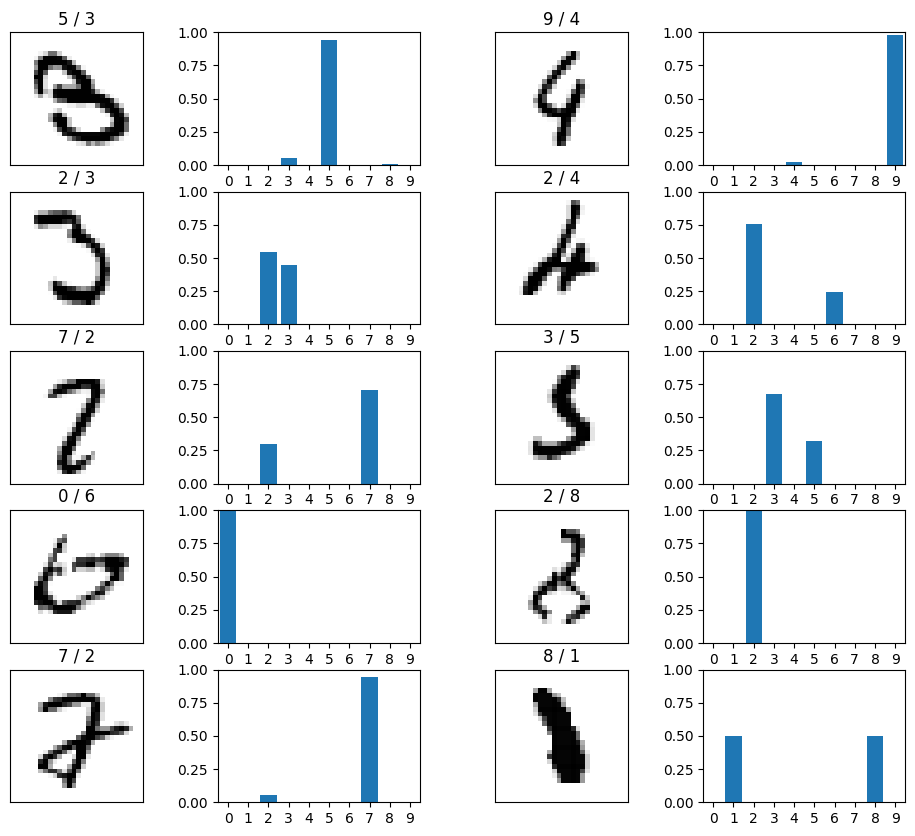

In [10]:
fig = plt.figure(figsize=(12, 10))
c = 0
step = 64
for i in range(0, len(test_images), step):
    images = test_images[i:i+step]
    labels = test_labels[i:i+step]
    p_vals = model.predict(images, verbose=0)
    for j, pred_label in enumerate(zip(p_vals, labels)):
        pred, label = pred_label
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction == actual:
            continue
        subplot = fig.add_subplot(5, 4, c*2+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title(f'{prediction} / {actual}')
        subplot.imshow(images[j].reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)
        subplot = fig.add_subplot(5, 4, c*2+2)
        subplot.set_xticks(range(10))
        subplot.set_xlim(-0.5, 9.5)
        subplot.set_ylim(0,1)
        subplot.bar(range(10), pred, align='center')
        c += 1
        if c == 10:
            break
    if c == 10:
        break